# Análisis exploratorio de datos

Librerias que se van a utilizar para el análisis exploratorio de datos

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Configuración inicial del dataframe.
Se va a analizar los datos de entrenamiento y de prueba juntos porque ayuda a asegurar que las caracteristicas de ambos conjuntos de datos son similares, con el fin de que el modelo generalice bien.

In [272]:
# Leer los archivos CSV
df_train = pd.read_csv('./base_train.csv', sep='|')
df_test = pd.read_csv('./base_validacion.csv', sep='|')

# Concatenar los DataFrames
df = pd.concat([df_train, df_test], ignore_index=True)

# Cambiar el nombre de las columnas para que sean mas descriptivas
df = df.rename(columns={"CO01ACP011RO": "cancelaciones_productos_ultimo_año",
                        "CO01ACP017CC": "meses_ultima_cancelacion",
                        "CO01END002RO": "saldo_promedio_productos_actual",
                        "CO01END010RO": "cupo_promedio_disponible_productos_actual",
                        "CO01END051RO": "saldo_total_productos_hace_9_meses",
                        "CO01END086RO": "utilizacion_total_productos_promedio_3_meses",
                        "CO01END094RO": "cupo_maximo_productos_actual",
                        "CO01EXP001CC": "meses_apertura_producto_mas_antiguo",
                        "CO01EXP002AH": "meses_apertura_producto_mas_reciente",
                        "CO01EXP003RO": "meses_apertura_producto_abierto_mas_antiguo",
                        "CO01MOR098RO": "ponderacion_reportes_dia_ultimos_24_meses",
                        "CO01NUM002AH": "numero_productos_abiertos",
                        "CO02END015CC": "porcentaje_cartera_vencida_actual",
                        "CO02EXP004TO": "meses_apertura_producto_abierto_mas_reciente",
                        "CO02EXP011TO": "porcentaje_productos_hasta_48_meses_en_libros",
                        "CO02MOR092TO": "ponderacion_reportes_dia_ultimos_18_meses",
                        "CO02NUM043RO": "porcentaje_productos_cerrados_total",
                        "CO02NUM086AH": "participacion_cuentas_ahorro_total",
                        "disp309": "sitema_operativo_celular_usuario",
                        "trx102": "monto_minimo_transado_ultimo_mes",
                        "trx106": "monto_minimo_transado_hace_2_meses",
                        "trx143": "std_monto_recargas_PSE_ultimos_12_meses",
                        "trx158": "promedio_monto_retirado_cajero_ultimos_12_meses",
                        "trx39": "std_cantidad_retiros_cajero_ultimos_12_meses",
                        "f_analisis": "fecha_desembolso",
                        "default": "incumplio_pagos"
                        })

## Valores faltantes

In [273]:
# Ver cuántos valores faltantes hay en cada columna
print(df.isnull().sum())

num_doc                                            0
fecha_desembolso                                   0
incumplio_pagos                                    0
tipo_cliente                                       0
std_cantidad_retiros_cajero_ultimos_12_meses       0
monto_minimo_transado_ultimo_mes                   0
monto_minimo_transado_hace_2_meses                 0
std_monto_recargas_PSE_ultimos_12_meses            0
promedio_monto_retirado_cajero_ultimos_12_meses    0
sitema_operativo_celular_usuario                   0
cupo_promedio_disponible_productos_actual          0
meses_ultima_cancelacion                           0
porcentaje_productos_hasta_48_meses_en_libros      0
meses_apertura_producto_abierto_mas_reciente       0
meses_apertura_producto_mas_antiguo                0
meses_apertura_producto_abierto_mas_antiguo        0
porcentaje_cartera_vencida_actual                  0
saldo_promedio_productos_actual                    0
utilizacion_total_productos_promedio_3_meses  

### Conclusión:

*   No hay ningun valor faltante en ninguna columna, entonces no toca hacer ningún procedimiento de control de valores faltantes.



## Analisis de todas variables

Ver el resumen estadístico de cada columna para entender como se comporta los datos.






In [274]:
# Resumen estadístico de cada columna
for columna in df.columns:
    if (columna not in ["num_doc"]): # No es necesario
        print("Descripción de la columna: " + columna)
        print(df[columna].describe())
        print("\n" + "-"*50 + "\n")

Descripción de la columna: fecha_desembolso
count     30344.000000
mean     201814.837859
std          23.509735
min      201801.000000
25%      201807.000000
50%      201810.000000
75%      201811.000000
max      201901.000000
Name: fecha_desembolso, dtype: float64

--------------------------------------------------

Descripción de la columna: incumplio_pagos
count    30344.000000
mean         0.067723
std          0.251275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: incumplio_pagos, dtype: float64

--------------------------------------------------

Descripción de la columna: tipo_cliente
count       30344
unique          2
top       adicion
freq        22174
Name: tipo_cliente, dtype: object

--------------------------------------------------

Descripción de la columna: std_cantidad_retiros_cajero_ultimos_12_meses
count    30344.000000
mean         0.668163
std          0.998557
min          0.000000
25%        

### Conclusiones:

*   La unica variable que sigue siendo categorica es tipo_cliente.
*   El resto de variables que podrían haber sido categoricas ya fueron convertidas a numericas posiblemente con codificación o encoding.
*   Además, por lo que puedo suponer, es que todas las variables numericas ya están estandarizadas, o al menos eso pienso porque los valores están muy balanceados.
*   La variable incumplio_pagos es la variable objetivo.

*   No es necesario utilizar el num_doc para el analisis.
*   La variable fecha_desembolso a pesar de ser una fecha ya está lista para utilizar como númerica (AAAAMM)
*   La variable sitema_operativo_celular_usuario tambien está númerica. Se podría seguir utilizando, aunque no creo que sea relevante para este tipo de problema.







## Analisis de la variable objetivo

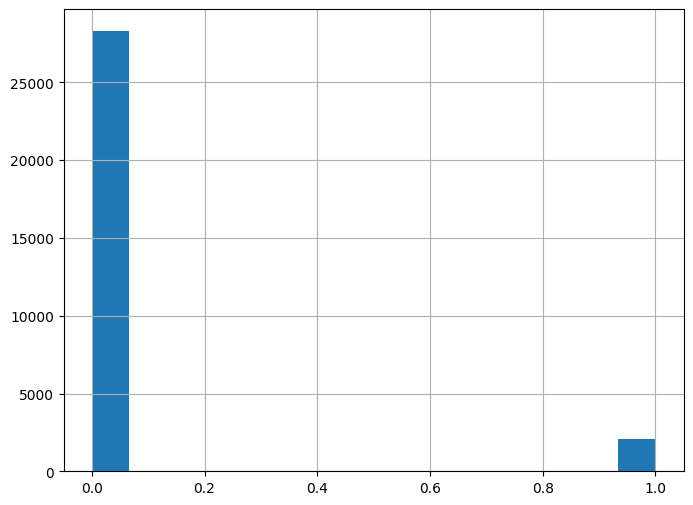

In [275]:
df['incumplio_pagos'].hist(bins=15, figsize=(8, 6))
plt.show()

In [276]:
# Distribución de la variable objetivo
print(df['incumplio_pagos'].value_counts(normalize=True)*100) #Porcentajes

incumplio_pagos
0    93.227656
1     6.772344
Name: proportion, dtype: float64


### Conclusiones:

*   Aprox. el 93% de los clientes no incumplieron con los pagos.
*   Aprox. el 7% de los clientes incumplieron con los pagos.
*   Esto podría presentar un problema con el modelado porque hay muy pocos datos de clientes que incumplieron con los pagos.



## Correlaciones


Calcular la correlación entre las variables numéricas para ver si hay relaciones lineales fuertes que podrían ser útiles o redundantes.

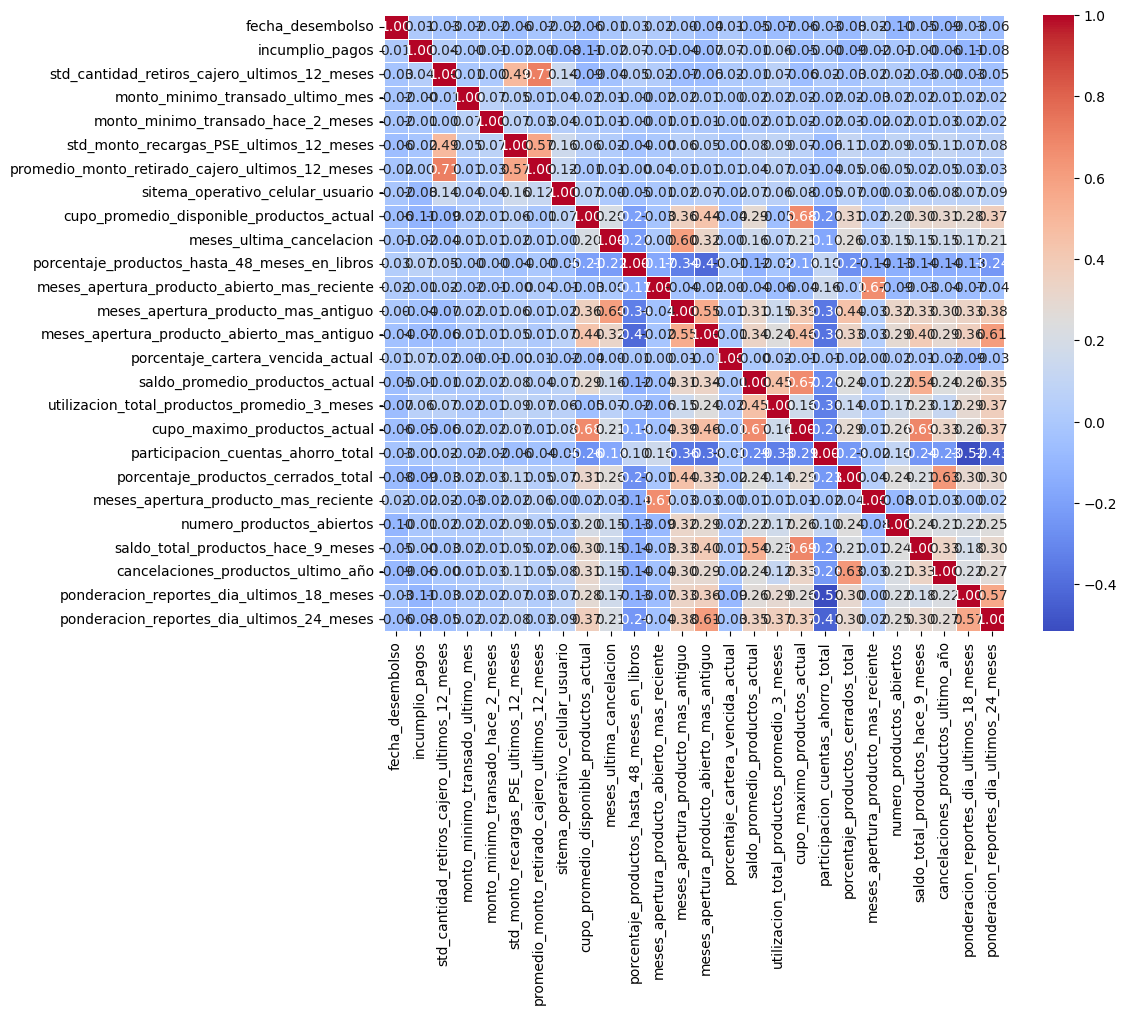

In [277]:
# Matriz de correlación
# Calcular la correlación de Pearson (por defecto)
correlacion = df.drop(columns=["num_doc","tipo_cliente"]).corr() # no es necesarios el id de lso clientes y el tipo_cliente es categorica

# Visualizar la correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Como los nuevos nombres de las columnas son tan largos y además, hay tantas variables, no es tan visible utilizar un headmap.

Entonces, voy a realizar el analisis de correlaciones por pasos.

Comenzaré con analizar como se correlacionan todas las variables con respecto a la variable objetivo (incumplio_pagos)

In [278]:
correlacionesAbsolutas = correlacion['incumplio_pagos'].abs()
print(correlacionesAbsolutas.sort_values(ascending=False))

incumplio_pagos                                    1.000000
cupo_promedio_disponible_productos_actual          0.114569
ponderacion_reportes_dia_ultimos_18_meses          0.109088
porcentaje_productos_cerrados_total                0.093420
sitema_operativo_celular_usuario                   0.083941
ponderacion_reportes_dia_ultimos_24_meses          0.080465
porcentaje_productos_hasta_48_meses_en_libros      0.071633
porcentaje_cartera_vencida_actual                  0.070011
meses_apertura_producto_abierto_mas_antiguo        0.069135
cancelaciones_productos_ultimo_año                 0.063749
utilizacion_total_productos_promedio_3_meses       0.056310
cupo_maximo_productos_actual                       0.054310
meses_apertura_producto_mas_antiguo                0.041222
std_cantidad_retiros_cajero_ultimos_12_meses       0.039302
meses_ultima_cancelacion                           0.022633
std_monto_recargas_PSE_ultimos_12_meses            0.019600
meses_apertura_producto_mas_reciente    

Ahora voy a analizar las correlaciones entre las variables independientes.

In [279]:
# Calcular la matriz de correlación completa sin la variable objetivo
matriz_correlacion = df.drop(columns=["num_doc","tipo_cliente",'incumplio_pagos']).corr()

# Convertir la matriz de correlación a formato largo (es decir, lista de pares de correlaciones)
correlaciones_largas = matriz_correlacion.unstack()

# Aplicar el valor absoluto a las correlaciones
correlaciones_absolutas = correlaciones_largas.abs()

# Eliminar las correlaciones de la diagonal (correlaciones de una variable consigo misma)
correlaciones_sin_diagonal = correlaciones_absolutas[correlaciones_absolutas < 1]

# Ordenar las correlaciones de mayor a menor para identificar las duplas más correlacionadas
correlaciones_ordenadas = correlaciones_sin_diagonal.sort_values(ascending=False)

# Mostrar las correlaciones mayores a 60%
print(correlaciones_ordenadas[correlaciones_absolutas > 0.6])

std_cantidad_retiros_cajero_ultimos_12_meses     promedio_monto_retirado_cajero_ultimos_12_meses    0.712879
promedio_monto_retirado_cajero_ultimos_12_meses  std_cantidad_retiros_cajero_ultimos_12_meses       0.712879
saldo_total_productos_hace_9_meses               cupo_maximo_productos_actual                       0.690587
cupo_maximo_productos_actual                     saldo_total_productos_hace_9_meses                 0.690587
                                                 cupo_promedio_disponible_productos_actual          0.676321
cupo_promedio_disponible_productos_actual        cupo_maximo_productos_actual                       0.676321
saldo_promedio_productos_actual                  cupo_maximo_productos_actual                       0.671411
cupo_maximo_productos_actual                     saldo_promedio_productos_actual                    0.671411
meses_apertura_producto_abierto_mas_reciente     meses_apertura_producto_mas_reciente               0.665409
meses_apertura_prod

## Conclusiones:

*   La variable absoluta mas correlacionada con la variable objetivo solo se relaciona un 11%. Entonces lo ideal es no utilizar un modelo predictivo lineal ya que no hay mucha relación entre las variables independientes y la dependiente.
*   Hay muchas variables independientes absolutas que se relacionan entre si (mas de 60%). Podría eliminar algunas variables independientes muy correlacionadas para simplificar el modelo y reducir la redundancia. Las variables que eliminaré son:
  *   "std_cantidad_retiros_cajero_ultimos_12_meses"
  *   "saldo_total_productos_hace_9_meses"
  *   "cupo_promedio_disponible_productos_actual"
  *   "saldo_promedio_productos_actual"
  *   "meses_apertura_producto_abierto_mas_reciente"
  *   "cancelaciones_productos_ultimo_año"
  *   "ponderacion_reportes_dia_ultimos_24_meses"
  *   "meses_apertura_producto_mas_antiguo"







# Modelo predictivo (Random Forests)

Como las variables independientes están muy poco correlacionadas con la variable objetivo, voy a utilizar un modelo predictivo no lineal. En este caso será **Random Forests**


Con las conclusiones realizadas en el analisis exploratorio, voy a proceder a usar los dataframes sin aquellas variables independientes que decidí eliminar en base a las conlusiones anterior.


Librerias que se van a utilizar para el modelado predictivo

In [280]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## División de los datos en conjunto de entrenamiento y prueba


Se comenzará a definir los dataframe de entrenamiento y de prueba

In [281]:
# Leer el archivo CSV
df_train = pd.read_csv('./base_train.csv', sep='|')

# Cambiar el nombre de las columnas para que sean mas descriptivas
df_train = df_train.rename(columns={"CO01ACP011RO": "cancelaciones_productos_ultimo_año",
                        "CO01ACP017CC": "meses_ultima_cancelacion",
                        "CO01END002RO": "saldo_promedio_productos_actual",
                        "CO01END010RO": "cupo_promedio_disponible_productos_actual",
                        "CO01END051RO": "saldo_total_productos_hace_9_meses",
                        "CO01END086RO": "utilizacion_total_productos_promedio_3_meses",
                        "CO01END094RO": "cupo_maximo_productos_actual",
                        "CO01EXP001CC": "meses_apertura_producto_mas_antiguo",
                        "CO01EXP002AH": "meses_apertura_producto_mas_reciente",
                        "CO01EXP003RO": "meses_apertura_producto_abierto_mas_antiguo",
                        "CO01MOR098RO": "ponderacion_reportes_dia_ultimos_24_meses",
                        "CO01NUM002AH": "numero_productos_abiertos",
                        "CO02END015CC": "porcentaje_cartera_vencida_actual",
                        "CO02EXP004TO": "meses_apertura_producto_abierto_mas_reciente",
                        "CO02EXP011TO": "porcentaje_productos_hasta_48_meses_en_libros",
                        "CO02MOR092TO": "ponderacion_reportes_dia_ultimos_18_meses",
                        "CO02NUM043RO": "porcentaje_productos_cerrados_total",
                        "CO02NUM086AH": "participacion_cuentas_ahorro_total",
                        "disp309": "sitema_operativo_celular_usuario",
                        "trx102": "monto_minimo_transado_ultimo_mes",
                        "trx106": "monto_minimo_transado_hace_2_meses",
                        "trx143": "std_monto_recargas_PSE_ultimos_12_meses",
                        "trx158": "promedio_monto_retirado_cajero_ultimos_12_meses",
                        "trx39": "std_cantidad_retiros_cajero_ultimos_12_meses",
                        "f_analisis": "fecha_desembolso",
                        "default": "incumplio_pagos"
                        })

# Eliminar las variables independientes que no se van a utilizar
df_train = df_train.drop(columns=["num_doc",
                                  "tipo_cliente",
                                  "std_cantidad_retiros_cajero_ultimos_12_meses",
                                  "saldo_total_productos_hace_9_meses",
                                  "cupo_promedio_disponible_productos_actual",
                                  "saldo_promedio_productos_actual",
                                  "meses_apertura_producto_abierto_mas_reciente",
                                  "cancelaciones_productos_ultimo_año",
                                  "ponderacion_reportes_dia_ultimos_24_meses",
                                  "meses_apertura_producto_mas_antiguo"
                                  ])

In [282]:
# Leer el archivo CSV
df_test = pd.read_csv('./base_validacion.csv', sep='|')

# Cambiar el nombre de las columnas para que sean mas descriptivas
df_test = df_test.rename(columns={"CO01ACP011RO": "cancelaciones_productos_ultimo_año",
                        "CO01ACP017CC": "meses_ultima_cancelacion",
                        "CO01END002RO": "saldo_promedio_productos_actual",
                        "CO01END010RO": "cupo_promedio_disponible_productos_actual",
                        "CO01END051RO": "saldo_total_productos_hace_9_meses",
                        "CO01END086RO": "utilizacion_total_productos_promedio_3_meses",
                        "CO01END094RO": "cupo_maximo_productos_actual",
                        "CO01EXP001CC": "meses_apertura_producto_mas_antiguo",
                        "CO01EXP002AH": "meses_apertura_producto_mas_reciente",
                        "CO01EXP003RO": "meses_apertura_producto_abierto_mas_antiguo",
                        "CO01MOR098RO": "ponderacion_reportes_dia_ultimos_24_meses",
                        "CO01NUM002AH": "numero_productos_abiertos",
                        "CO02END015CC": "porcentaje_cartera_vencida_actual",
                        "CO02EXP004TO": "meses_apertura_producto_abierto_mas_reciente",
                        "CO02EXP011TO": "porcentaje_productos_hasta_48_meses_en_libros",
                        "CO02MOR092TO": "ponderacion_reportes_dia_ultimos_18_meses",
                        "CO02NUM043RO": "porcentaje_productos_cerrados_total",
                        "CO02NUM086AH": "participacion_cuentas_ahorro_total",
                        "disp309": "sitema_operativo_celular_usuario",
                        "trx102": "monto_minimo_transado_ultimo_mes",
                        "trx106": "monto_minimo_transado_hace_2_meses",
                        "trx143": "std_monto_recargas_PSE_ultimos_12_meses",
                        "trx158": "promedio_monto_retirado_cajero_ultimos_12_meses",
                        "trx39": "std_cantidad_retiros_cajero_ultimos_12_meses",
                        "f_analisis": "fecha_desembolso",
                        "default": "incumplio_pagos"
                        })

# Eliminar las variables independientes que no se van a utilizar
df_test = df_test.drop(columns=["num_doc",
                                  "tipo_cliente",
                                  "std_cantidad_retiros_cajero_ultimos_12_meses",
                                  "saldo_total_productos_hace_9_meses",
                                  "cupo_promedio_disponible_productos_actual",
                                  "saldo_promedio_productos_actual",
                                  "meses_apertura_producto_abierto_mas_reciente",
                                  "cancelaciones_productos_ultimo_año",
                                  "ponderacion_reportes_dia_ultimos_24_meses",
                                  "meses_apertura_producto_mas_antiguo"
                                  ])

Ahora voy a proceder a definir las variables independientes (X) y dependientes (y) del modelo:

In [283]:
# Definir variables independientes (X) y dependientes (y) de entrenamiento
X_train = df_train.drop('incumplio_pagos', axis=1)
y_train = df_train['incumplio_pagos']

# Definir variables independientes (X) y dependientes (y) de prueba
X_test = df_test.drop('incumplio_pagos', axis=1)
y_test = df_test['incumplio_pagos']


## Entrenamiento del modelo base Random Forest

Se creará un modelo base para ver como se comporta el modelo.

Hay que tener en cuenta que como la variable objetivo es binaria (0 y 1), las prediciones se harán de la misma forma binaria. Luego las convertiré en probabilidades entre 0 y 1.

In [284]:
# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=4) #Semilla para producir los mismos resultados

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

## Evaluación del modelo base

Para evaluar el modelo base voy a utilizar las metricas de:

* **Precisión, recall y F1-score:** Estas métricas ayudan a evaluar el rendimiento del modelo más allá de la precisión.
* **Matriz de confusión:** Evalúa cómo se desempeña el modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
* **Métrica AUC:** Métrica que indica la capacidad del modelo para distinguir entre clases. Un valor de AUC cercano a 1 indica que el modelo tiene muy buen rendimiento, mientras que un valor cercano a 0.5 indica que el modelo es básicamente un clasificador aleatorio.




In [285]:
# Predicciones binarias (0 y 1)
y_pred = rf.predict(X_test)

In [286]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1918
           1       0.33      0.02      0.04       150

    accuracy                           0.93      2068
   macro avg       0.63      0.51      0.50      2068
weighted avg       0.89      0.93      0.89      2068



El modelo base predice con una certeza del 96% los que realmente no incumplieron con el pago (Valor binario 0) pero solo predice correctamente el 4% de todos los que realmente incumplieron (Valor binario 1). Esto se puede explicar porque anteriormente vimos que los datos están muy desbalanceados.

In [287]:
# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[1912    6]
 [ 147    3]]


En la matriz de confusion podemos llegar a la misma conclusión, predice correctamente la mayoria de los clientes que no incumplieron con el pago. Pero predice incorrectamente la mayoria de los que incumplieron con el pago.

In [288]:
# Métrica AUC
y_prob = rf.predict_proba(X_test)[:, 1]  # Obtener probabilidades para la clase positiva
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score}')

AUC: 0.6403684393465416


Respecto al AUC, el modelo base no tiene buen rendimiento, debido a que está muy cercano al 0.5, que corresponde a que el modelo es casi un clasificador aleatorio.

## Importancia de las características

Como el conjunto de datos tiene tantas variables, sería bueno observar la importancia de las características para identificar cuáles son más relevantes para predecir el incumplimiento de pagos. Esto permitiría reducir dimensionalidad y ajustar el modelo.

In [289]:
# Concatenar los datos en entrenamiento y de prueba
X = pd.concat([X_train, X_test], ignore_index=True)

# Obtener la importancia de las características
importancias = rf.feature_importances_
importancia_df = pd.DataFrame({'Característica': X.columns, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df)

                                     Característica  Importancia
10     utilizacion_total_productos_promedio_3_meses     0.088163
14             meses_apertura_producto_mas_reciente     0.086091
4   promedio_monto_retirado_cajero_ultimos_12_meses     0.081801
12               participacion_cuentas_ahorro_total     0.071272
3           std_monto_recargas_PSE_ultimos_12_meses     0.066261
0                                  fecha_desembolso     0.066195
16        ponderacion_reportes_dia_ultimos_18_meses     0.063883
6                          meses_ultima_cancelacion     0.061787
7     porcentaje_productos_hasta_48_meses_en_libros     0.055359
11                     cupo_maximo_productos_actual     0.055016
8       meses_apertura_producto_abierto_mas_antiguo     0.053635
5                  sitema_operativo_celular_usuario     0.051131
15                        numero_productos_abiertos     0.045237
9                 porcentaje_cartera_vencida_actual     0.041874
1                  monto_

Luego de hacer varios modelos descartando algunas de las caracteristicas menos importantes, se concluyó que se podría eliminar las 2 ultimas caracteristicas, pero aun así el cambio en las métricas no es significativo. Las dos caracteristicas fueron:
* monto_minimo_transado_hace_2_meses
* porcentaje_productos_cerrados_total     

## Optimización del modelo (Ajuste de hiperparámetros)


Como el modelo base no tuvo buenas métricas. Voy a proceder a otimizar el modelo de bosques aleatorios para ver si puedo llegar a mejores métricas.

In [290]:
# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles
    'max_depth': [5, 10, 15, None]        # Profundidad máxima
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor AUC Score:", grid_search.best_score_)


Mejores parámetros: {'max_depth': 10, 'n_estimators': 150}
Mejor AUC Score: 0.7740293005260378


## Modelo Final Optimo


Para optimizar el modelo final se va a tener en cuenta:
* Hiperparametro 'max_depth': 10
* Hiperparametro 'n_estimators': 150
* Eliminar la caracteristica monto_minimo_transado_hace_2_meses
* Eliminar la caracteristica porcentaje_productos_cerrados_total

In [291]:
# Definir variables independientes (X) y dependientes (y) de entrenamiento
X_train = df_train.drop(columns=["incumplio_pagos",
                                  "monto_minimo_transado_hace_2_meses",
                                  "porcentaje_productos_cerrados_total"
                                  ], axis=1)
y_train = df_train['incumplio_pagos']

# Definir variables independientes (X) y dependientes (y) de prueba
X_test = df_test.drop(columns=["incumplio_pagos",
                                  "monto_minimo_transado_hace_2_meses",
                                  "porcentaje_productos_cerrados_total"
                                  ], axis=1)
y_test = df_test['incumplio_pagos']

In [292]:
# Crear el modelo final Random Forest
rf_optimo = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=4)

# Entrenar el modelo final
rf_optimo.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=4)

# Predecir grupo de riesgo de base_prueba

Inicialmente voy a predecir las probabilidades de riesgo que tiene los clientes para incumplir los pagos. En este caso no lo haré binario (0 y 1) sino que necesito las probabilidades para luego clasificarlos en un grupo de riesgo según la siguiente tabla:


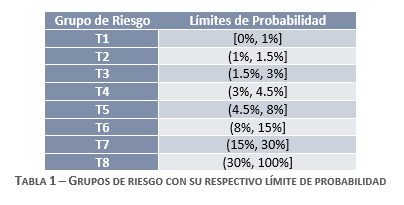

In [293]:
# Leer el archivo CSV
df_evaluador = pd.read_csv('./base_prueba.csv', sep='|')

# Cambiar el nombre de las columnas para que sean mas descriptivas
df_evaluador = df_evaluador.rename(columns={"CO01ACP011RO": "cancelaciones_productos_ultimo_año",
                        "CO01ACP017CC": "meses_ultima_cancelacion",
                        "CO01END002RO": "saldo_promedio_productos_actual",
                        "CO01END010RO": "cupo_promedio_disponible_productos_actual",
                        "CO01END051RO": "saldo_total_productos_hace_9_meses",
                        "CO01END086RO": "utilizacion_total_productos_promedio_3_meses",
                        "CO01END094RO": "cupo_maximo_productos_actual",
                        "CO01EXP001CC": "meses_apertura_producto_mas_antiguo",
                        "CO01EXP002AH": "meses_apertura_producto_mas_reciente",
                        "CO01EXP003RO": "meses_apertura_producto_abierto_mas_antiguo",
                        "CO01MOR098RO": "ponderacion_reportes_dia_ultimos_24_meses",
                        "CO01NUM002AH": "numero_productos_abiertos",
                        "CO02END015CC": "porcentaje_cartera_vencida_actual",
                        "CO02EXP004TO": "meses_apertura_producto_abierto_mas_reciente",
                        "CO02EXP011TO": "porcentaje_productos_hasta_48_meses_en_libros",
                        "CO02MOR092TO": "ponderacion_reportes_dia_ultimos_18_meses",
                        "CO02NUM043RO": "porcentaje_productos_cerrados_total",
                        "CO02NUM086AH": "participacion_cuentas_ahorro_total",
                        "disp309": "sitema_operativo_celular_usuario",
                        "trx102": "monto_minimo_transado_ultimo_mes",
                        "trx106": "monto_minimo_transado_hace_2_meses",
                        "trx143": "std_monto_recargas_PSE_ultimos_12_meses",
                        "trx158": "promedio_monto_retirado_cajero_ultimos_12_meses",
                        "trx39": "std_cantidad_retiros_cajero_ultimos_12_meses",
                        "f_analisis": "fecha_desembolso",
                        "default": "incumplio_pagos"
                        })

# Eliminar las variables independientes iniciales que no se utilizaron
df_evaluador = df_evaluador.drop(columns=["num_doc",
                                  "tipo_cliente",
                                  "std_cantidad_retiros_cajero_ultimos_12_meses",
                                  "saldo_total_productos_hace_9_meses",
                                  "cupo_promedio_disponible_productos_actual",
                                  "saldo_promedio_productos_actual",
                                  "meses_apertura_producto_abierto_mas_reciente",
                                  "cancelaciones_productos_ultimo_año",
                                  "ponderacion_reportes_dia_ultimos_24_meses",
                                  "meses_apertura_producto_mas_antiguo"
                                  ])


In [294]:
# Definir las variables independientes (X) de los datos a evaluar
X_evaluador = df_evaluador.drop(columns=[
                                  "monto_minimo_transado_hace_2_meses",
                                  "porcentaje_productos_cerrados_total"
                                  ], axis=1)

In [295]:
# Predecir la variable objetivo con probabilidades con el modelo optimo
y_evaluador_pred = rf_optimo.predict_proba(X_evaluador)[:, 1]  # Probabilidades de la clase positiva (1)

In [296]:
# Definir los límites de los grupos de riesgo
limites = [0, 0.01, 0.015, 0.03, 0.045, 0.08, 0.15, 0.30, 1.00]

# Definir las etiquetas correspondientes a cada grupo de riesgo
grupos = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']

# Convertir las probabilidades a grupos de riesgo
Y_grupos_riesgo = pd.cut(y_evaluador_pred, bins=limites, labels=grupos, include_lowest=True)


Ahora que tengo las predicciones en base a grupos de riesgo, lo exportaré en un CSV

In [297]:
# Leer el archivo base_prueba sin ningun cambio
df_base_prueba = pd.read_csv('./base_prueba.csv', sep='|')

# Convertir las predicciones de categoria a una Serie de Pandas
grupo_riesgo = pd.Series(Y_grupos_riesgo, name='grupo_riesgo')

# Combinar ambos df
df_resultado = pd.concat([df_base_prueba, grupo_riesgo], axis=1)

In [298]:
# Exportar el DataFrame a CSV
df_resultado.to_csv('resultados_augusto_balbin.csv', index=False)

# Conclusiones finales

* Sería ideal utilizar técnicas de balanceo como sobremuestreo o submuestreo porque la mayoria de los datos están distribuidos mayoritariamente en clientes que no incumplieron el pago, es decir, los datos están muy desbalanceados (93% corresponden a no incumplieron el pago vs el 7% de los que incumplieron el pago).
* Se podría probar con otros modelos predictivos para conseguir mejor metricas, en este caso el modelo optimo alcanzó un AUC score de aprox. 0.77, que corresponde a que el modelo tiene medianamente un buen rendimiento.

